# Анализ результатов расчетов OLGA

Файл с анализом результатов массовых расчетов режима работы трубопровода в OLGA

версия 0.3 (Arth) от 02.10.2017 

сравнение результатов расчета по простой модели и по простой плоской модели


In [1]:
""" импортируем библиотеки необходимые для проведения расчетов"""
import tplread as tp
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Читаем данные из каталога с результатам расчетов. Загружается два вида моделей:
* первая модель описывает участок трубопровода с одним "горбом" и длинным горизонтальным участком после него
![схема модели](pic/model_simple.png "схема простой модели с одним горбом")

* вторая модель описывает участок трубопровода без "горба" - плоский
![схема модели](pic/model_plain.png "схема простой модели с одним горбом")

Обе модели содержат одинаковое количество контрольных точек в которых контролируются параметры потока. Обе модели запускались для различных расходов газа, жидкости и различных значений давления на конце трубопровода. 

Задачи моделей можно сформулировать следующим образом: 
* оценить условия образования больших пробок при различных условиях работы трубопровода
* оценить степень влияния пробок на механическую устойчивость трубопровода
* оценить влияния "горба" на образование пробок, сравнив режимы работы в одной точке при наличии и отсутствии "горба"

In [2]:
# читаем сначала данные плоской модели
tsim = tp.TplParams('NPsimple/')
tsim.read_data()
tsim.calc_data()
# затем читаем данные модели с одним горбом модели
tpl = tp.TplParams('NPtest1/')
tpl.read_data()
tpl.calc_data()

#print(t.df_super)

160 файла найдено.
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . read done.
calc done.
160 файла найдено.
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . read done.
calc done.


Служебный блок. Проверка считанных данных. Проверяются заголовки ключевых слов, диапазоны изменения параметров. 

In [3]:
def check(t):
    # процедура вывод результатов проверки загрузки данных
    print(" файлов прочитано", len(t.files))
    print('ключевые слова для расчетов      ',t.key_list)
    print('полный список ключевых слов      ',t.key_list_all)
    print('список точек контроля параметров ',t.pipe_list)
    print('список значений давления в трубе ',t.p_end_list)
    print('список значений дебитов жидкости ',t.qliq_list)
    print('список значений дебитов газа     ',t.qgas_list)
    
check(tsim)     # проверим первый блок файлов и выведем результаты

 файлов прочитано 160
ключевые слова для расчетов       ['HOLEXP', 'USFEXP', 'USL', 'USG']
полный список ключевых слов       ['HOL' 'HOLEXP' 'ID' 'LSBEXP' 'LSLEXP' 'PT' 'QG' 'QGST' 'QLST' 'QOST' 'QT'
 'TM' 'TU' 'UG' 'UL' 'USFEXP' 'USG' 'USL' 'USLT' 'USTEXP']
список точек контроля параметров  ['Pipe-3' 'Pipe-5' 'Pipe-7' 'Pipe-11' 'Pipe-13' 'Pipe-17' 'Pipe-19'
 'Pipe-21' 'Pipe-23']
список значений давления в трубе  [  5.  10.]
список значений дебитов жидкости  [  7500.  10000.  12500.  15000.  17500.  20000.  22500.  25000.  27500.
  30000.]
список значений дебитов газа      [  3.   5.   7.   9.  11.  13.  15.  17.]


In [4]:
check(tpl) # проверим второй блок файлов и выведем результаты

 файлов прочитано 160
ключевые слова для расчетов       ['HOLEXP', 'USFEXP', 'USL', 'USG']
полный список ключевых слов       ['HOL' 'HOLEXP' 'ID' 'LSBEXP' 'LSLEXP' 'PT' 'QG' 'QGST' 'QLST' 'QOST' 'QT'
 'TM' 'TU' 'UG' 'UL' 'USFEXP' 'USG' 'USL' 'USLT' 'USTEXP']
список точек контроля параметров  ['Pipe-3' 'Pipe-5' 'Pipe-7' 'Pipe-11' 'Pipe-13' 'Pipe-17' 'Pipe-19'
 'Pipe-21' 'Pipe-23']
список значений давления в трубе  [  5.  10.]
список значений дебитов жидкости  [  7500.  10000.  12500.  15000.  17500.  20000.  22500.  25000.  27500.
  30000.]
список значений дебитов газа      [  3.   5.   7.   9.  11.  13.  15.  17.]


Соответствие приведенный названий точек контроля и их положения на трубе приведено на рисунке
![схема модели](pic/model_simple.svg "схема простой модели с одним горбом")

# Карты влияния потока на устойчивость трубопровода

Для всех расчитанных параметров можно построить карты влияния потока на устойчивость трубопровода. 
Карта показывает значения коэффциента устойчивости от расхода газа и жидкости, а также отношения коэффициента для "горбатой" трубы по отношению к трубе плоской

Контрольная точка  Pipe-3 --------------------------------------------------------
Карта для для плоского трубопровода


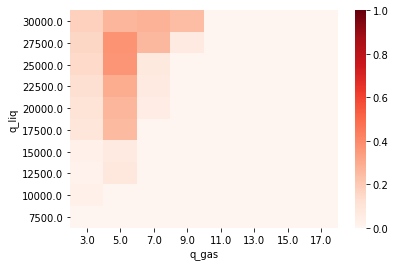

Карта трубопровода с "горбом"


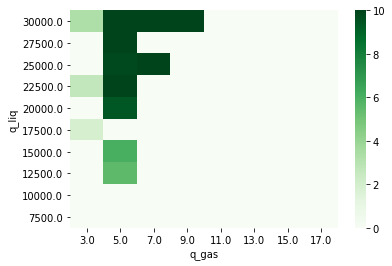

Карта отношений степени воздействия


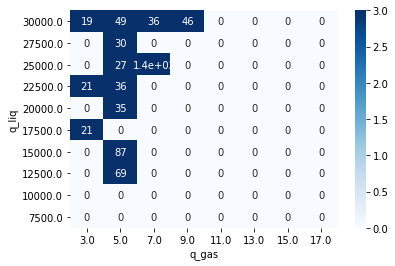

Контрольная точка  Pipe-5 --------------------------------------------------------
Карта для для плоского трубопровода


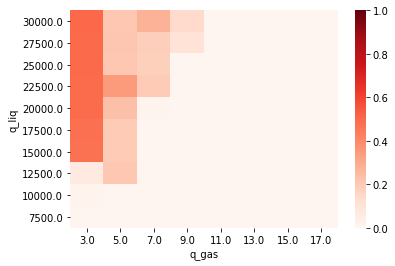

Карта трубопровода с "горбом"


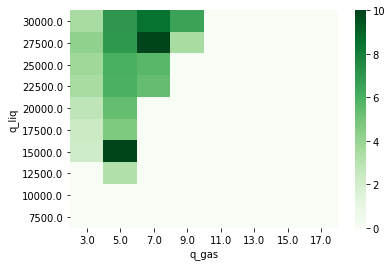

Карта отношений степени воздействия


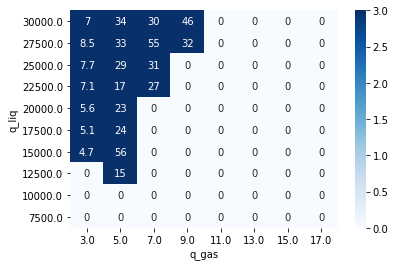

Контрольная точка  Pipe-7 --------------------------------------------------------
Карта для для плоского трубопровода


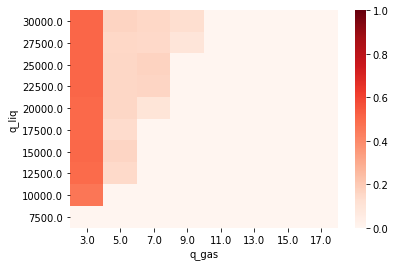

Карта трубопровода с "горбом"


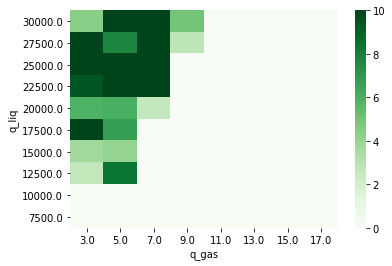

Карта отношений степени воздействия


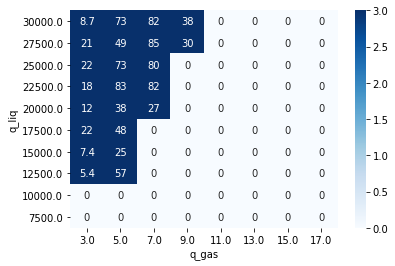

Контрольная точка  Pipe-11 --------------------------------------------------------
Карта для для плоского трубопровода


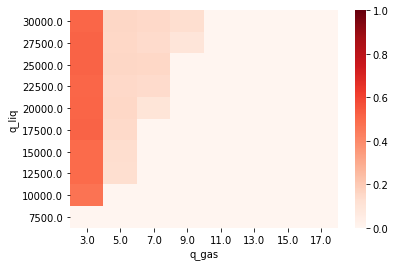

Карта трубопровода с "горбом"


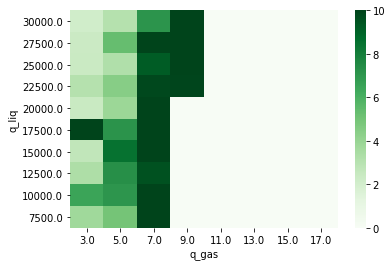

Карта отношений степени воздействия


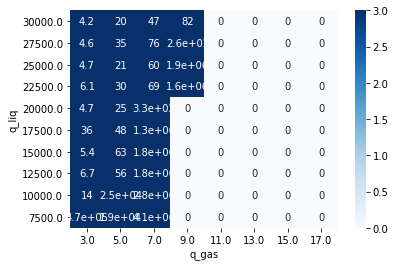

Контрольная точка  Pipe-13 --------------------------------------------------------
Карта для для плоского трубопровода


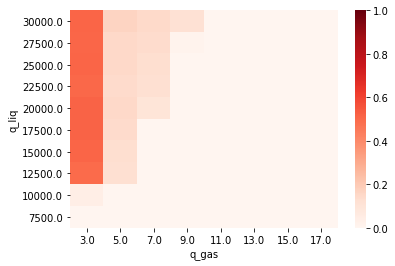

Карта трубопровода с "горбом"


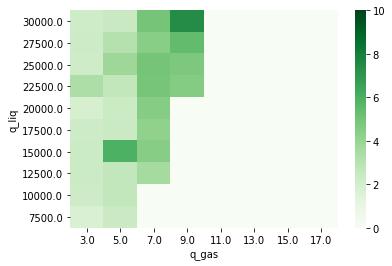

Карта отношений степени воздействия


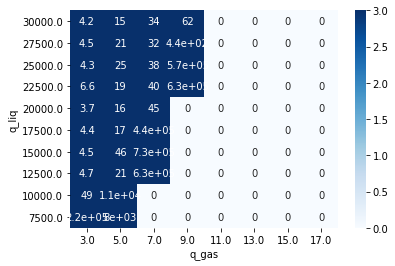

Контрольная точка  Pipe-17 --------------------------------------------------------
Карта для для плоского трубопровода


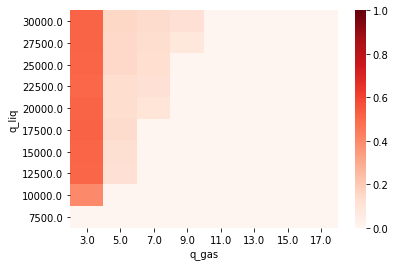

Карта трубопровода с "горбом"


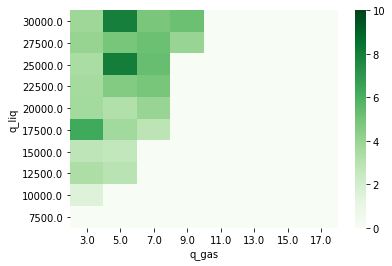

Карта отношений степени воздействия


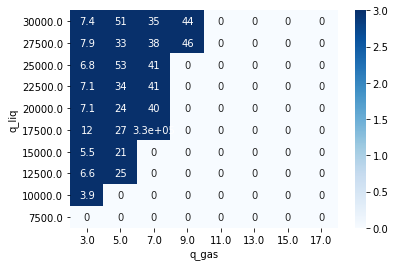

Контрольная точка  Pipe-19 --------------------------------------------------------
Карта для для плоского трубопровода


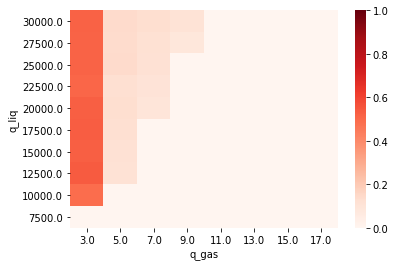

Карта трубопровода с "горбом"


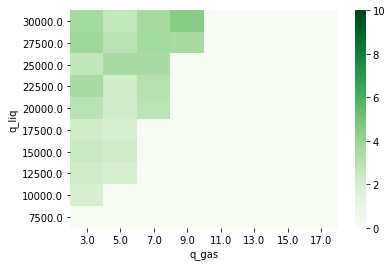

Карта отношений степени воздействия


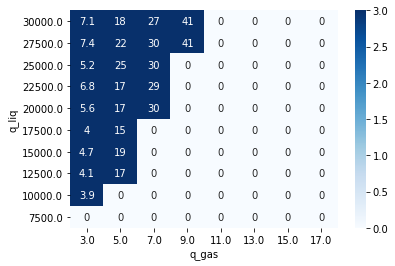

Контрольная точка  Pipe-21 --------------------------------------------------------
Карта для для плоского трубопровода


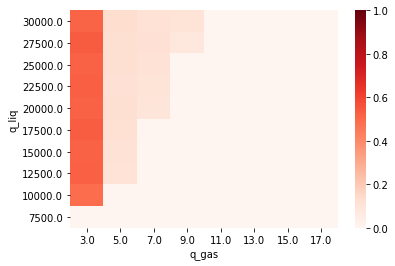

Карта трубопровода с "горбом"


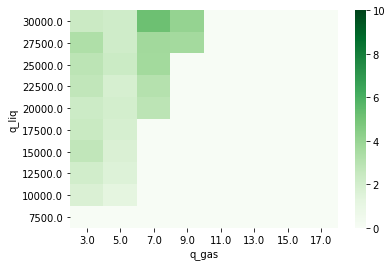

Карта отношений степени воздействия


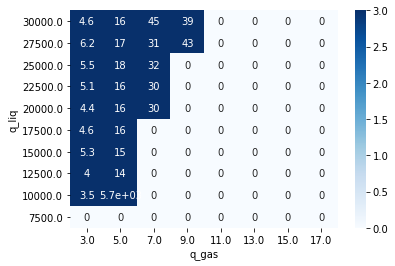

Контрольная точка  Pipe-23 --------------------------------------------------------
Карта для для плоского трубопровода


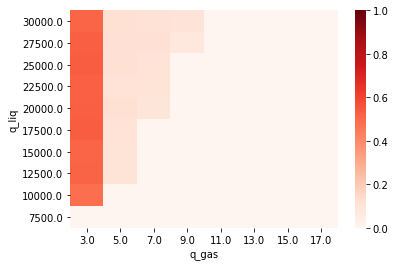

Карта трубопровода с "горбом"


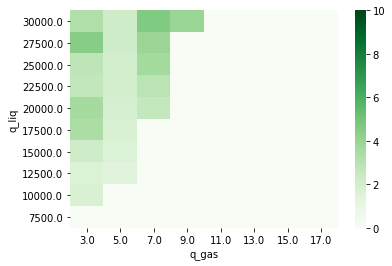

Карта отношений степени воздействия


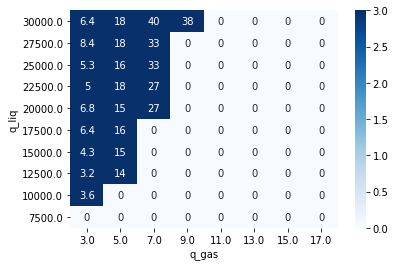

In [5]:
def plot_map(pp, pend=10):
    print('Контрольная точка ',pp, '--------------------------------------------------------')
    
    print('Карта для для плоского трубопровода')   
    a=tsim.get_matr_ql_qg(pipe=pp,p_end=pend,val='slug_delta_holdup')     # расчет карты по данным моделирования
    sns.heatmap(a,cmap="Reds", vmin=0, vmax=1)             # построение визуального представления карты
    show()
    
    print('Карта трубопровода с "горбом"')   
    b=tpl.get_matr_ql_qg(pipe=pp,p_end=pend,val='mech')      # расчет карты по данным моделирования
    sns.heatmap(b,cmap="Greens", vmin=0, vmax=10)           # построение визуального представления карты
    show()
    
    print('Карта отношений степени воздействия')   
    c = b / a 
    sns.heatmap(c, annot=True,  cmap='Blues', vmin=0, vmax=3)
    show()
    
for pp in tsim.pipe_list:           # строим для всех контрольных точек
    plot_map(pp)

Анализ построенных карт показывает, что наибольшее влияния потока на трубу происходит на точках Pipe-7 - Pipe 13
![схема модели](pic/model_simple_1.svg "схема простой модели с одним горбом")
При этом 500 метром горизонтальной трубы практически выравнивают матрицы влияния

Контрольная точка  Pipe-13 --------------------------------------------------------
Карта для для плоского трубопровода


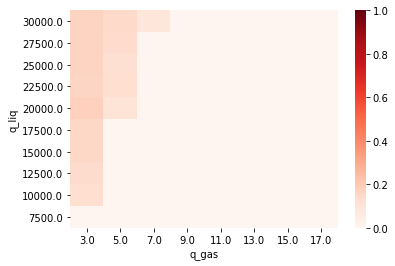

Карта трубопровода с "горбом"


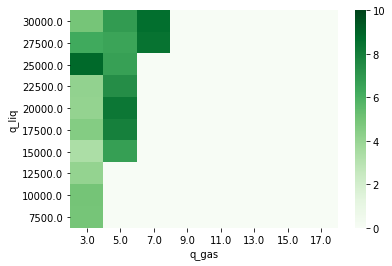

Карта отношений степени воздействия


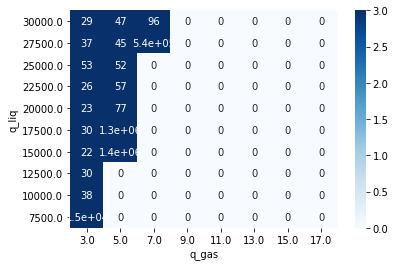

In [6]:
plot_map('Pipe-13',pend=5)

# Детальное рассмотрение отдельных вариантов

Рассмотрим детальные графики параметров для отдельных переменных, на основании которых проводился расчет карт влияния

In [7]:
# вспомогательная функция для поиска номера трубы в списке
def ipipe(tpl,pp):
    pipe_ind = tsim.pipe_list.tolist().index(pp)
    return pipe_ind

def plot_trend_example():
    tp.plot_trend(tsim,klist=k,qg_num=qg, ql_num=ql,pipe_num=pp,p_num=p)[400:].plot()
    show()
    tp.plot_trend(tpl,klist=k,qg_num=qg, ql_num=ql,pipe_num=pp,p_num=p)[400:].plot()
    show()
    tp.plot_trend_super(tsim,qg_num=qg, ql_num=ql,pipe_num=pp,p_num=p).plot()
    show()

## Пример расчета с параметрами 

['HOLEXP'] ['Pipe-11']  p_end =  [5.0]  q_g =  [3.0]  q_l =  [20000.0]


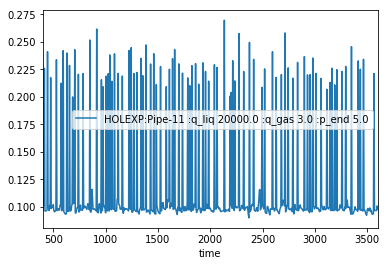

['HOLEXP'] ['Pipe-11']  p_end =  [5.0]  q_g =  [3.0]  q_l =  [20000.0]


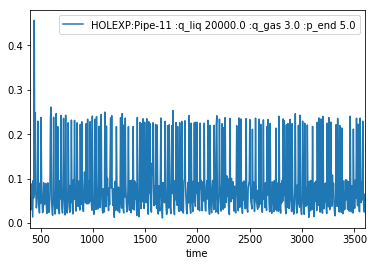

['MECH:Pipe-11'] ['Pipe-11']  p_end =  [5.0]  q_g =  [3.0]  q_l =  [20000.0]


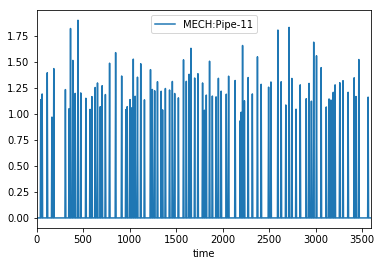

In [8]:
qg=0           # номер значения дебита газа
ql=5           # номер значения дебита жидкости
pp=3           # номер значения дебита участка трубы
p=0            # номер значения дебита давления
k=['HOLEXP']   # номер значения ключевого слова

plot_trend_example()

# Часть 2


--------------------------------------------------------
Расчет карт для: 
 - контрольной точки - " Pipe-5 "
 - даление - " 5 "
 - карта - " mech " 
--------------------------------------------------------
Максимальное значение на карте "плоского трубопровода" =  25.7377230907 , при:
 - скорости жидкости =  25000.0 
 - скорости газа =  5.0

Максимальное значение на карте трубопровода с "горбом" =  21.2536202481 , при:
 - скорости жидкости =  27500.0 
 - скорости газа =  5.0


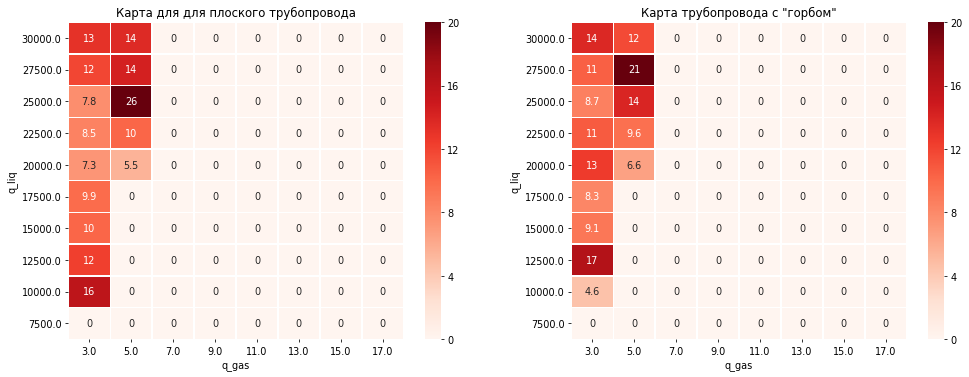

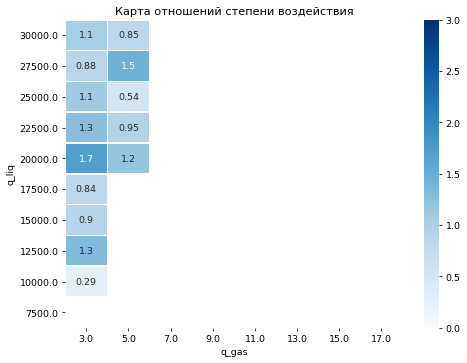

In [10]:
def plot_map_comparsion(pp, pend=10, value='mech'):

    """
    Вывод карт для сравнения

    :param pp: - название узла, к примеру 'Pipe-5'
    :param pend:  - давление?
    :param value: - что выводить.. 'mech' - смещение?,
                                   'slug_delta_holdup'
                                   'slug_holdup'
                                   'film_holdup'
                                   'slug_velocity'
    :return:
    """

    if value == 'mech':
        vmax = 20
    else:
        vmax = 1

    print('\n--------------------------------------------------------'
          '\nРасчет карт для: '
          '\n - контрольной точки - "',pp,
          '"\n - даление - "',pend,
          '"\n - карта - "',value,
          '" \n--------------------------------------------------------')

    AA = plt.figure(figsize=(17, 6), dpi=70)
    ax1 = AA.add_subplot(121)
    #plt.axes()
    plt.title('Карта для для плоского трубопровода')
    a = tsim.get_matr_ql_qg(pipe=pp, p_end=pend, val=value)  # расчет карты по данным моделирования
    sns.heatmap(a, cmap="Reds", annot=True, vmin=0, vmax=vmax, linewidths=.5)
    plt.yticks(rotation="horizontal")

    ax2 = AA.add_subplot(122)
    plt.title('Карта трубопровода с "горбом"')
    b = tpl.get_matr_ql_qg(pipe=pp, p_end=pend, val=value)  # расчет карты по данным моделирования
    sns.heatmap(b, cmap="Reds", annot=True, vmin=0, vmax=vmax, linewidths=.5)  # построение визуального представления карты
    plt.yticks(rotation="horizontal")
    AA.show()

    if value == 'mech':
        BB = plt.figure(figsize=(8, 6), dpi=68)
        ax3 = BB.add_subplot(111)
        plt.title('Карта отношений степени воздействия')
        c = b / a
        sns.heatmap(c, annot=True, cmap='Blues', vmin=0, vmax=3, linewidths=.5)
        plt.yticks(rotation="horizontal")
        BB.show()

    # Нахождение максимального элемента на карте плоского трубопровода
    a_max = a.max().max()
    a_i = a.max(axis = 1).idxmax()
    a_j = a.max(axis = 0).idxmax()
    a_i_idx = a.index.get_loc(a_i)
    a_j_idx = a.columns.get_loc(a_j)

    # Нахождение максимального элемента на карте трубопровода с перепадами высот
    b_max = b.max().max()
    b_i = b.max(axis = 1).idxmax()
    b_j = b.max(axis = 0).idxmax()
    b_i_idx = b.index.get_loc(b_i)
    b_j_idx = b.columns.get_loc(b_j)


    print("Максимальное значение на карте \"плоского трубопровода\" = ", a_max, ", при:"
          "\n - скорости жидкости = ", a_i,
          "\n - скорости газа = ", a_j)
    print("\nМаксимальное значение на карте трубопровода с \"горбом\" = ", b_max, ", при:"
          "\n - скорости жидкости = ", b_i,
          "\n - скорости газа = ", b_j)


plot_map_comparsion('Pipe-5', pend=5, value='mech')